
# **Usando modelos pré-treinado no Keras**

---


1. VGG16
2. ResNet
3. Inception v3
4. MobileNet v2
5. DenseNet201
6. Mobile NASNet 
7. EfficientNetB7

https://keras.io/api/applications/

In [1]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

model = VGG16(weights='imagenet')
model.summary()

2025-11-03 18:15:31.429852: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-03 18:15:31.994692: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762204532.171082     588 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762204532.218921     588 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1762204532.644454     588 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [2]:
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/imagesDLCV.zip
!unzip imagesDLCV.zip
!rm rf images/class1/.DS_Store  

--2025-11-03 18:15:43--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/imagesDLCV.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.142.34, 3.5.245.169, 3.5.246.150, ...
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.142.34|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-11-03 18:15:44 ERROR 404: Not Found.

unzip:  cannot find or open imagesDLCV.zip, imagesDLCV.zip.zip or imagesDLCV.zip.ZIP.
rm: cannot remove 'rf': No such file or directory
rm: cannot remove 'images/class1/.DS_Store': No such file or directory


In [3]:
import cv2
from os import listdir
from os.path import isfile, join

# Get images located in ./images folder    
mypath = "./images/class1/"
file_names = [f for f in listdir(mypath) if isfile(join(mypath, f))]
file_names

['1539714414867.jpg',
 '3040_e_41CT.jpg',
 '81z6x3SZEpL._AC_SL1500_.jpg',
 'Basketball_(Ball).jpg',
 'christmas-stockings-3006869_1280.jpg',
 'download.jpg',
 'German_Shepherd_-_DSC_0346_(10096362833).jpg',
 'limo-safety-ftr.jpg',
 'long-haired-collie-5766447_1280.jpg',
 'photo-1575361204480-aadea25e6e68.jpg',
 'spiderweb_1050x700.jpg']

I0000 00:00:1762204545.209039     669 service.cc:152] XLA service 0x726234009ab0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1762204545.209073     669 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-11-03 18:15:45.259428: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1762204545.380200     669 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-11-03 18:15:46.073716: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4', 184 bytes spill stores, 184 bytes spill loads

2025-11-03 18:15:46.708121: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4', 42

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


I0000 00:00:1762204548.504912     669 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
[('n07880968', 'burrito', np.float32(0.9861176)), ('n07583066', 'guacamole', np.float32(0.00920625)), ('n07697537', 'hotdog', np.float32(0.0019767126))]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[('n04380533', 'table_lamp', np.float32(0.75231713)), ('n03637318', 'lampshade', np.float32(0.24671328)), ('n04507155', 'umbrella', np.float32(9.367739e-05))]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[('n03223299', 'doormat', np.float32(0.992151)), ('n04599235', 'wool', np.float32(0.004988454)), ('n02808304', 'bath_towel', np.float32(0.0021596963))]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[('n02802426', 'basketball', np.float32(0.9968723)), ('n04118538', 'rugby_ball', np.float32(0.0013279264)), ('n04254680', 'soccer_ball', np.float32(0.0004842531))]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[('n03026506', 'Christmas_stocking', np.float32(0.9999466)), ('n04254777', 'sock', np.float32(3.606955e-05)), ('n03775071', 'mitten', np.float32(6.386174e-06))]
1/1 ━━━━━━━━━━

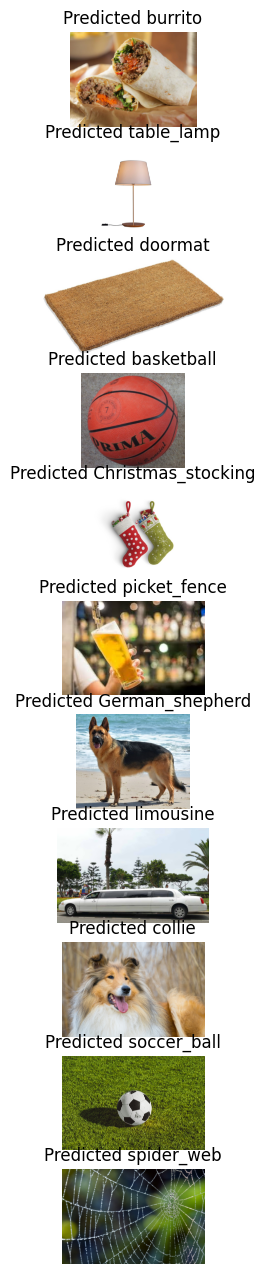

In [4]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(16,16))

# Loop through images run them through our classifer
for (i,file) in enumerate(file_names):

    img = image.load_img(mypath+file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    #load image using opencv
    img2 = cv2.imread(mypath+file)
    #imageL = cv2.resize(img2, None, fx=.5, fy=.5, interpolation = cv2.INTER_CUBIC) 
    
    # Get Predictions
    preds = model.predict(x)
    preditions = decode_predictions(preds, top=3)[0]
    print(preditions)
    # Plot image
    sub = fig.add_subplot(len(file_names),1, i+1)
    sub.set_title(f'Predicted {str(preditions[0][1])}')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

plt.show()

# **2. ResNet50**

In [5]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')
model.summary()

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[('n07880968', 'burrito', np.float32(0.9992057)), ('n07583066', 'guacamole', np.float32(0.00043267745)), ('n03041632', 'cleaver', np.float32(0.00016233222))]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[('n04380533', 'table_lamp', np.float32(0.5790854)), ('n03637318', 'lampshade', np.float32(0.4209093)), ('n04286575', 'spotlight', np.float32(1.8706174e-06))]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[('n03223299', 'doormat', np.float32(0.99930704)), ('n03530642', 'honeycomb', np.float32(0.00019992229)), ('n02808304', 'bath_towel', np.float32(0.00015088149))]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[('n02802426', 'basketball', np.float32(1.0)), ('n04118538', 'rugby_ball', np.float32(4.111665e-11)), ('n04023962', 'punching_bag', np.float32(1.2584597e-12))]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[('n03026506', 'Christmas_stocking', np.float32(0.99991536)), ('n04254777', 'sock', np.float32(3.0212555e-05)), ('n04026417', 'purse', np.float32(9.157489e-06))]
1/1 ━━━━━━━

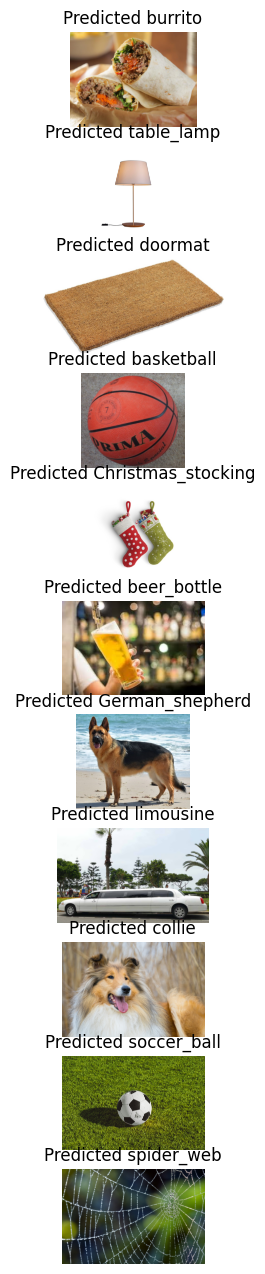

In [6]:
fig=plt.figure(figsize=(16,16))

# Loop through images run them through our classifer
for (i,file) in enumerate(file_names):

    img = image.load_img(mypath+file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    #load image using opencv
    img2 = cv2.imread(mypath+file)
    #imageL = cv2.resize(img2, None, fx=.5, fy=.5, interpolation = cv2.INTER_CUBIC) 
    
    # Get Predictions
    preds = model.predict(x)
    preditions = decode_predictions(preds, top=3)[0]
    print(preditions)
    # Plot image
    sub = fig.add_subplot(len(file_names),1, i+1)
    sub.set_title(f'Predicted {str(preditions[0][1])}')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

plt.show()

# **3. Inception V3**

In [7]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
import numpy as np

model = InceptionV3(weights='imagenet')
model.summary()

96112376/96112376 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 149, 149,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 149, 149,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 147, 147,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 147, 147,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 73, 73,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 73, 73,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 71, 71,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 23,851,784 (90.99 MB)

 Trainable params: 23,817,352 (90.86 MB)

 Non-trainable params: 34,432 (134.50 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
[('n07880968', 'burrito', np.float32(0.987166)), ('n07697313', 'cheeseburger', np.float32(0.0003785222)), ('n07583066', 'guacamole', np.float32(0.0002535074))]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[('n04380533', 'table_lamp', np.float32(0.53388476)), ('n03637318', 'lampshade', np.float32(0.45455372)), ('n04286575', 'spotlight', np.float32(0.00038526935))]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[('n03223299', 'doormat', np.float32(0.9473085)), ('n04599235', 'wool', np.float32(0.0030349416)), ('n04417672', 'thatch', np.float32(0.00080328155))]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[('n02802426', 'basketball', np.float32(0.99990046)), ('n01770081', 'harvestman', np.float32(3.371717e-06)), ('n02279972', 'monarch', np.float32(2.3073046e-06))]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[('n03026506', 'Christmas_stocking', np.float32(0.99889755)), ('n04254777', 'sock', np.float32(3.8970087e-05)), ('n02028035', 'redshank', np.float32(3.314522e-05))]
1/1 ━━━━━━━━━

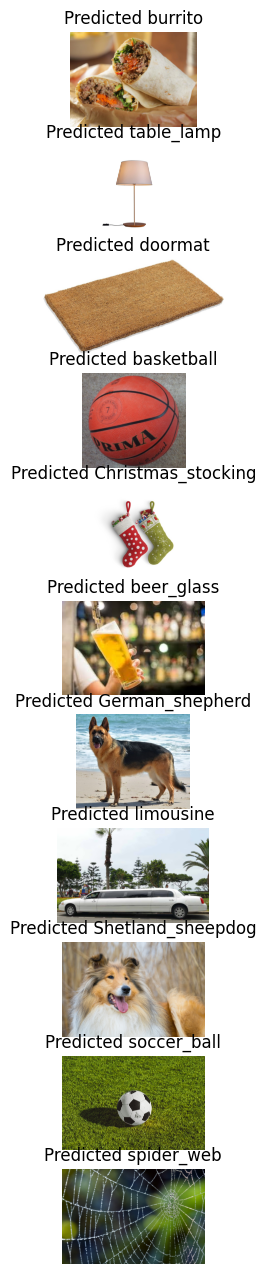

In [8]:
fig=plt.figure(figsize=(16,16))

# Loop through images run them through our classifer
for (i,file) in enumerate(file_names):

    #note the change in input image size to 299,299
    img = image.load_img(mypath+file, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    #load image using opencv
    img2 = cv2.imread(mypath+file)
    #imageL = cv2.resize(img2, None, fx=.5, fy=.5, interpolation = cv2.INTER_CUBIC) 
    
    # Get Predictions
    preds = model.predict(x)
    preditions = decode_predictions(preds, top=3)[0]
    print(preditions)
    # Plot image
    sub = fig.add_subplot(len(file_names),1, i+1)
    sub.set_title(f'Predicted {str(preditions[0][1])}')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

plt.show()

# **4. MobileNet** 

In [9]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

model = MobileNetV2(weights='imagenet')
model.summary()

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
[('n07880968', 'burrito', np.float32(0.9274903)), ('n07717556', 'butternut_squash', np.float32(0.015862864)), ('n07697537', 'hotdog', np.float32(0.00854642))]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[('n04380533', 'table_lamp', np.float32(0.47663754)), ('n03637318', 'lampshade', np.float32(0.34941393)), ('n06794110', 'street_sign', np.float32(0.0051615005))]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[('n04548362', 'wallet', np.float32(0.5119998)), ('n03223299', 'doormat', np.float32(0.45910293)), ('n04599235', 'wool', np.float32(0.0032206122))]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[('n02802426', 'basketball', np.float32(0.99931395)), ('n04118538', 'rugby_ball', np.float32(0.0004623888)), ('n03134739', 'croquet_ball', np.float32(4.372629e-05))]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[('n03026506', 'Christmas_stocking', np.float32(0.81501824)), ('n04026417', 'purse', np.float32(0.043969452)), ('n04254777', 'sock', np.float32(0.017959006))]
1/1 ━━━━━━━━━━━━━━

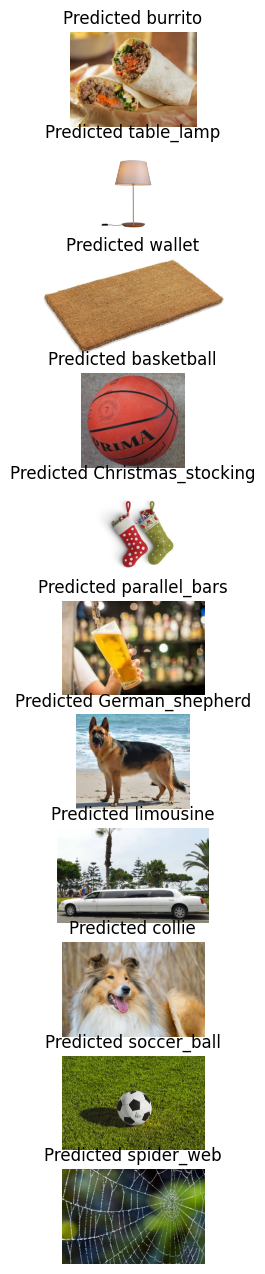

In [10]:
fig=plt.figure(figsize=(16,16))

# Loop through images run them through our classifer
for (i,file) in enumerate(file_names):

    #from keras.preprocessing import image # Need to reload as opencv2 seems to have a conflict
    img = image.load_img(mypath+file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    #load image using opencv
    img2 = cv2.imread(mypath+file)
    #imageL = cv2.resize(img2, None, fx=.5, fy=.5, interpolation = cv2.INTER_CUBIC) 
    
    # Get Predictions
    preds = model.predict(x)
    preditions = decode_predictions(preds, top=3)[0]
    print(preditions)
    # Plot image
    sub = fig.add_subplot(len(file_names),1, i+1)
    sub.set_title(f'Predicted {str(preditions[0][1])}')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

plt.show()

# **5. DenseNet201** 

In [11]:
from tensorflow.keras.applications.densenet import DenseNet201
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.densenet import preprocess_input
import numpy as np

model = DenseNet201(weights='imagenet')
model.summary()

82524592/82524592 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "densenet201"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer_4[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 20,242,984 (77.22 MB)

 Trainable params: 20,013,928 (76.35 MB)

 Non-trainable params: 229,056 (894.75 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step
[('n07880968', 'burrito', np.float32(0.999779)), ('n07875152', 'potpie', np.float32(8.791009e-05)), ('n07871810', 'meat_loaf', np.float32(3.224927e-05))]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[('n04380533', 'table_lamp', np.float32(0.7073075)), ('n03637318', 'lampshade', np.float32(0.28678334)), ('n04507155', 'umbrella', np.float32(0.000559866))]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[('n03223299', 'doormat', np.float32(0.99986553)), ('n02808304', 'bath_towel', np.float32(5.919449e-05)), ('n04599235', 'wool', np.float32(3.4242454e-05))]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[('n02802426', 'basketball', np.float32(0.99998724)), ('n04118538', 'rugby_ball', np.float32(1.1367343e-05)), ('n04409515', 'tennis_ball', np.float32(1.0450402e-06))]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[('n03026506', 'Christmas_stocking', np.float32(0.9999548)), ('n04254777', 'sock', np.float32(3.6527093e-05)), ('n03908618', 'pencil_box', np.float32(4.7388166e-06))]
1/1 ━━━━━

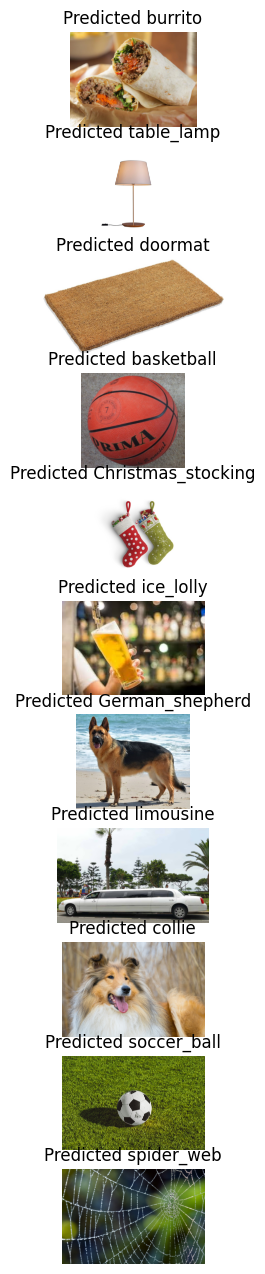

In [12]:
fig=plt.figure(figsize=(16,16))

# Loop through images run them through our classifer
for (i,file) in enumerate(file_names):

    img = image.load_img(mypath+file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    #load image using opencv
    img2 = cv2.imread(mypath+file)
    #imageL = cv2.resize(img2, None, fx=.5, fy=.5, interpolation = cv2.INTER_CUBIC) 
    
    # Get Predictions
    preds = model.predict(x)
    preditions = decode_predictions(preds, top=3)[0]
    print(preditions)
    # Plot image
    sub = fig.add_subplot(len(file_names),1, i+1)
    sub.set_title(f'Predicted {str(preditions[0][1])}')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

plt.show()

# **6. Mobile NASNet** 

In [13]:
from tensorflow.keras.applications.nasnet import NASNetMobile
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.nasnet import preprocess_input
import numpy as np

model = NASNetMobile(weights='imagenet')
model.summary()

24227760/24227760 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "nasnet_mobile"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv1 (Conv2D) │ (None, 111, 111,  │        864 │ input_layer_5[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn1            │ (None, 111, 111,  │        128 │ stem_conv1[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, 111, 111,  │          0 │ stem_bn1[0][0]    │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reduction_conv_1_s… │ (None, 111, 111,  │        352 │ activation_94[0]… │
│ (Conv2D)            │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reduction_bn_1_ste… │ (None, 111, 111,  │         44 │ reduction_conv_1… │
│ (BatchNormalizatio… │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, 111, 111,  │          0 │ reduction_bn_1_s… │
│ (Activation)        │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, 111, 111,  │          0 │ stem_bn1[0][0]    │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_p… │ (None, 115, 115,  │          0 │ activation_95[0]… │
│ (ZeroPadding2D)     │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_p… │ (None, 117, 117,  │          0 │ activation_97[0]… │
│ (ZeroPadding2D)     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_r… │ (None, 56, 56,    │        396 │ separable_conv_1… │
│ (SeparableConv2D)   │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_r… │ (None, 56, 56,    │      1,920 │ separable_conv_1… │
│ (SeparableConv2D)   │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_b… │ (None, 56, 56,    │         44 │ separable_conv_1… │
│ (BatchNormalizatio… │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_b… │ (None, 56, 56,    │         44 │ separable_conv_1… │
│ (BatchNormalizatio… │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, 56, 56,    │          0 │ separable_conv_1… │
│ (Activation)        │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, 56, 56,    │          0 │ separable_conv_1… │
│ (Activation)        │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_2_r… │ (None, 56, 56,    │        396 │ activation_96[0]

 Total params: 5,326,716 (20.32 MB)

 Trainable params: 5,289,978 (20.18 MB)

 Non-trainable params: 36,738 (143.51 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
[('n07880968', 'burrito', np.float32(0.9552526)), ('n07583066', 'guacamole', np.float32(0.0021756256)), ('n07873807', 'pizza', np.float32(0.0006240914))]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[('n04380533', 'table_lamp', np.float32(0.6100447)), ('n03637318', 'lampshade', np.float32(0.26310036)), ('n02018795', 'bustard', np.float32(0.0024743087))]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[('n03223299', 'doormat', np.float32(0.94695807)), ('n02786058', 'Band_Aid', np.float32(0.008385584)), ('n02808304', 'bath_towel', np.float32(0.0019701784))]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[('n02802426', 'basketball', np.float32(0.9487752)), ('n04409515', 'tennis_ball', np.float32(0.00061159075)), ('n04540053', 'volleyball', np.float32(0.000578121))]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[('n03026506', 'Christmas_stocking', np.float32(0.9484806)), ('n03775071', 'mitten', np.float32(0.0022283716)), ('n02786058', 'Band_Aid', np.float32(0.0009880463))]
1/1 ━━━━━━━━

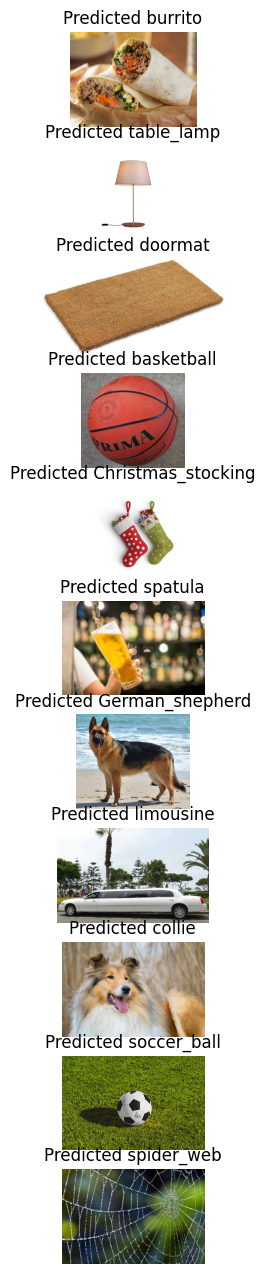

In [14]:
fig=plt.figure(figsize=(16,16))

# Loop through images run them through our classifer
for (i,file) in enumerate(file_names):

    img = image.load_img(mypath+file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    #load image using opencv
    img2 = cv2.imread(mypath+file)
    #imageL = cv2.resize(img2, None, fx=.5, fy=.5, interpolation = cv2.INTER_CUBIC) 
    
    # Get Predictions
    preds = model.predict(x)
    preditions = decode_predictions(preds, top=3)[0]
    print(preditions)
    # Plot image
    sub = fig.add_subplot(len(file_names),1, i+1)
    sub.set_title(f'Predicted {str(preditions[0][1])}')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

plt.show()

## **7. EfficientNetB7**

Try other EfficientNets B0 to B7 - https://keras.io/api/applications/efficientnet/

In [15]:
from tensorflow.keras.applications.efficientnet import EfficientNetB7
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
import numpy as np

model = EfficientNetB7(weights='imagenet')
model.summary()

268326632/268326632 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


Model: "efficientnetb7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 600, 600,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 600, 600,  │          0 │ input_layer_6[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 600, 600,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 600, 600,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 601, 601,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 300, 300,  │      1,728 │ stem_conv_pad[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 300, 300,  │        256 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 300, 300,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 300, 300,  │        576 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 300, 300,  │        256 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 300, 300,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 64)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 64)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 16)  │      1,040 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 64)  │      1,088 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 300, 300,  │          0 │ block1a_activati… │
│ (Multiply)          │ 64)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 300, 300,  │      2,048 │ block1a_se_excit

 Total params: 66,658,687 (254.28 MB)

 Trainable params: 66,347,960 (253.10 MB)

 Non-trainable params: 310,727 (1.19 MB)

2025-11-03 18:17:34.964713: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-11-03 18:17:35.119331: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-11-03 18:17:35.273496: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
[('n07880968', 'burrito', np.float32(0.81312853)), ('n07583066', 'guacamole', np.float32(0.0021764315)), ('n07875152', 'potpie', np.float32(0.0016006503))]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
[('n04380533', 'table_lamp', np.float32(0.52585)), ('n03637318', 'lampshade', np.float32(0.22624227)), ('n04286575', 'spotlight', np.float32(0.0023293584))]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
[('n03223299', 'doormat', np.float32(0.28474718)), ('n02808304', 'bath_towel', np.float32(0.13372388)), ('n03207743', 'dishrag', np.float32(0.0812311))]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
[('n02802426', 'basketball', np.float32(0.917281)), ('n02279972', 'monarch', np.float32(0.0004827905)), ('n02190166', 'fly', np.float32(0.00045804682))]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
[('n03026506', 'Christmas_stocking', np.float32(0.846644)), ('n03775071', 'mitten', np.float32(0.0024939661)), ('n04254777', 'sock', np.float32(0.002034371))]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms

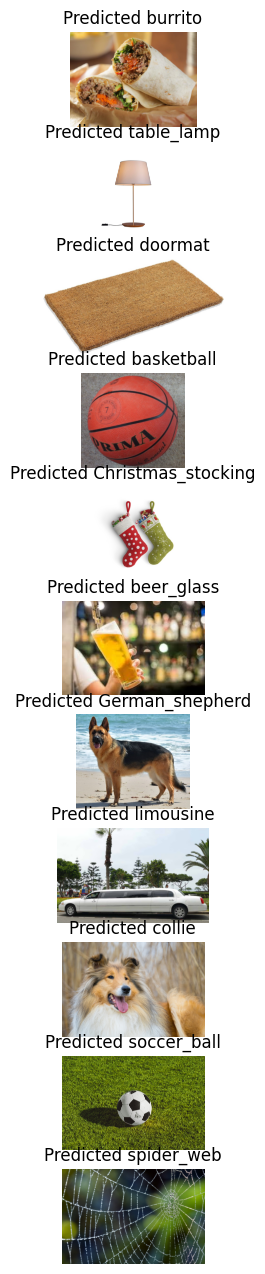

In [16]:
fig=plt.figure(figsize=(16,16))

# Loop through images run them through our classifer
for (i,file) in enumerate(file_names):

    # Note input size has increased to 600,600
    img = image.load_img(mypath+file, target_size=(600, 600))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    #load image using opencv
    img2 = cv2.imread(mypath+file)
    #imageL = cv2.resize(img2, None, fx=.5, fy=.5, interpolation = cv2.INTER_CUBIC) 
    
    # Get Predictions
    preds = model.predict(x)
    preditions = decode_predictions(preds, top=3)[0]
    print(preditions)
    # Plot image
    sub = fig.add_subplot(len(file_names),1, i+1)
    sub.set_title(f'Predicted {str(preditions[0][1])}')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

plt.show()